In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/GeneraciónCauya2024.csv')


In [ ]:
df.describe()

,Unnamed: 0,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,...,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24
count,349.000000,345.000000,347.000000,344.000000,345.000000,341.000000,344.000000,342.000000,343.000000,343.000000,...,342.000000,342.000000,341.000000,344.000000,345.000000,345.000000,345.000000,346.000000,346.000000,347.000000
mean,3927.544413,380.046493,379.004841,380.011628,375.563594,379.027097,386.543837,387.245029,389.992653,392.841749,...,400.161988,392.907135,397.625806,393.439302,393.879072,396.312464,388.924290,389.817110,385.666358,383.110663
std,2340.207093,213.088125,213.203215,210.664759,209.242583,212.170640,210.840553,216.022495,220.841564,225.444081,...,217.827804,218.187181,220.642536,220.925784,216.670262,217.203704,218.229643,217.229591,218.362023,215.565242
min,44.000000,48.400000,19.360000,20.240000,0.880000,21.120000,13.200000,0.440000,23.320000,40.480000,...,2.200000,0.440000,50.600000,26.840000,47.960000,77.440000,7.480000,46.640000,31.240000,10.120000
25%,1924.000000,201.960000,202.840000,211.640000,207.680000,207.680000,217.580000,221.650000,198.220000,199.760000,...,207.350000,199.650000,194.920000,207.900000,209.440000,207.240000,204.160000,206.580000,201.190000,204.820000
50%,3921.000000,325.600000,330.440000,322.300000,322.520000,322.520000,336.600000,332.860000,343.640000,340.120000,...,350.680000,346.060000,341.000000,346.720000,347.160000,349.800000,337.920000,337.480000,336.820000,335.280000
75%,5871.000000,509.520000,505.560000,504.680000,504.680000,507.760000,522.830000,523.380000,539.440000,542.520000,...,545.270000,531.080000,553.520000,542.410000,537.240000,557.040000,529.320000,527.780000,525.250000,519.420000
max,8585.000000,898.920000,898.040000,895.840000,891.880000,888.360000,888.800000,898.480000,895.400000,894.960000,...,917.400000,923.560000,931.920000,930.600000,927.520000,898.920000,906.840000,897.600000,897.160000,898.480000


In [ ]:
#revision de datos duplicados
du=df.duplicated().sum()
porcent = (du/349)*100
print(porcent)

0.0


In [ ]:
# Revisar el numero de columnas y datos vacios
print(df.info(), '\n')
df.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     349 non-null    int64         
 1   Id             349 non-null    object        
 2   Values_code    349 non-null    object        
 3   Values_Hour01  345 non-null    float64       
 4   Values_Hour02  347 non-null    float64       
 5   Values_Hour03  344 non-null    float64       
 6   Values_Hour04  345 non-null    float64       
 7   Values_Hour05  341 non-null    float64       
 8   Values_Hour06  344 non-null    float64       
 9   Values_Hour07  342 non-null    float64       
 10  Values_Hour08  343 non-null    float64       
 11  Values_Hour09  343 non-null    float64       
 12  Values_Hour10  342 non-null    float64       
 13  Values_Hour11  343 non-null    float64       
 14  Values_Hour12  341 non-null    float64       
 15  Values_Hour13  342 non-

,0
Values_Hour12,8
Values_Hour17,8
Values_Hour14,8
Values_Hour05,8
Values_Hour07,7
Values_Hour16,7
Values_Hour15,7
Values_Hour13,7
Values_Hour10,7
Values_Hour08,6


# Pivoteo y manipulacion del dataset

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# se pivotea el datase
df_melted = pd.melt(df, id_vars=['Date', 'Values_code'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 25)],
                    var_name='Hour', value_name='Value')

# se limpia hora (1 to 24)
df_melted['Hour'] = df_melted['Hour'].str.extract('(\d+)').astype(int)

# se remplaza 24 por 0
df_melted['Hour'] = df_melted['Hour'].replace(24, 0)

# Miro los encabezados
print(df_melted.head())

        Date Values_code  Hour   Value
0 2024-11-27        3AQP     1     NaN
1 2024-11-28        3AQP     1  341.88
2 2024-11-29        3AQP     1  319.00
3 2024-11-30        3AQP     1  323.84
4 2024-12-01        3AQP     1  188.76


In [ ]:
# Agrego una columna fecha hora para hacer los graficos
df_melted['Datetime'] = pd.to_datetime(df_melted['Date'].astype(str) + ' ' + df_melted['Hour'].astype(str) + ':00')
df_melted.fillna(0) # Los Valores en blanco se toman como 0 deacuerdo a el planteamiento del problema
# reviso los encabezados
print(df_melted.head())

        Date Values_code  Hour   Value            Datetime
0 2024-11-27        3AQP     1     NaN 2024-11-27 01:00:00
1 2024-11-28        3AQP     1  341.88 2024-11-28 01:00:00
2 2024-11-29        3AQP     1  319.00 2024-11-29 01:00:00
3 2024-11-30        3AQP     1  323.84 2024-11-30 01:00:00
4 2024-12-01        3AQP     1  188.76 2024-12-01 01:00:00


# Graficas de produccion por Horas

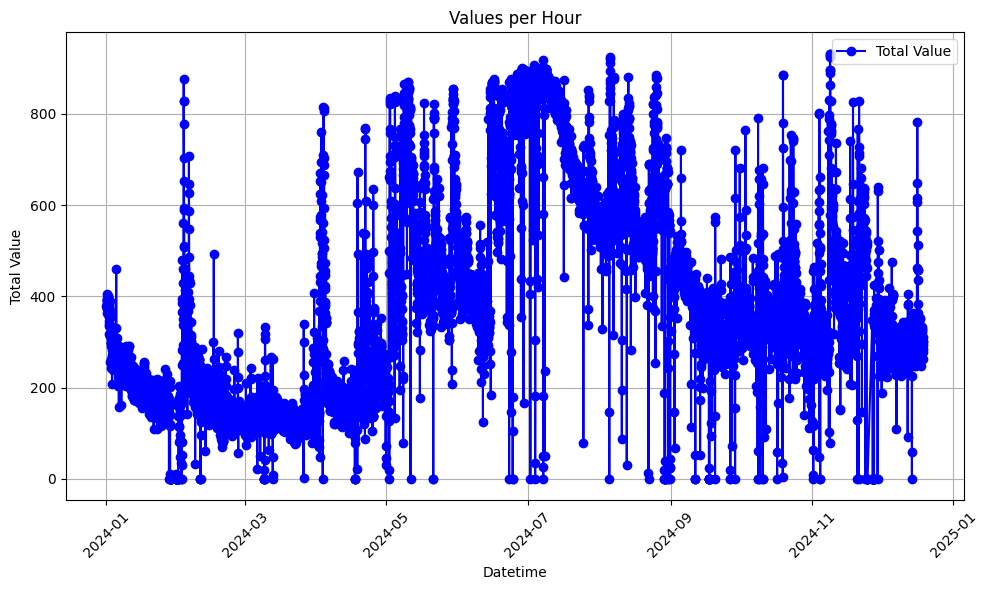

In [ ]:

# Agrupo los daots por hora
df_grouped = df_melted.groupby('Datetime')['Value'].sum().reset_index()

# Plot the data per hour
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Datetime'], df_grouped['Value'], marker='o', linestyle='-', color='b', label='Total Value')

# Customize the plot with titles and labels
plt.title('Values per Hour')
plt.xlabel('Datetime')
plt.ylabel('Total Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Obtener el último día disponible en el conjunto de datos
ultimo_dia = df_melted['Date'].max()

# Filtrar los datos para obtener solo las filas correspondientes al último día
df_ultimo_dia = df_melted[df_melted['Date'] == ultimo_dia]

# Mostrar las primeras filas del nuevo DataFrame
print(df_ultimo_dia.head())

           Date Values_code  Hour   Value            Datetime
21   2024-12-18        3AQP     1  291.72 2024-12-18 01:00:00
370  2024-12-18        3AQP     2  282.04 2024-12-18 02:00:00
719  2024-12-18        3AQP     3  277.64 2024-12-18 03:00:00
1068 2024-12-18        3AQP     4  246.40 2024-12-18 04:00:00
1417 2024-12-18        3AQP     5  268.40 2024-12-18 05:00:00


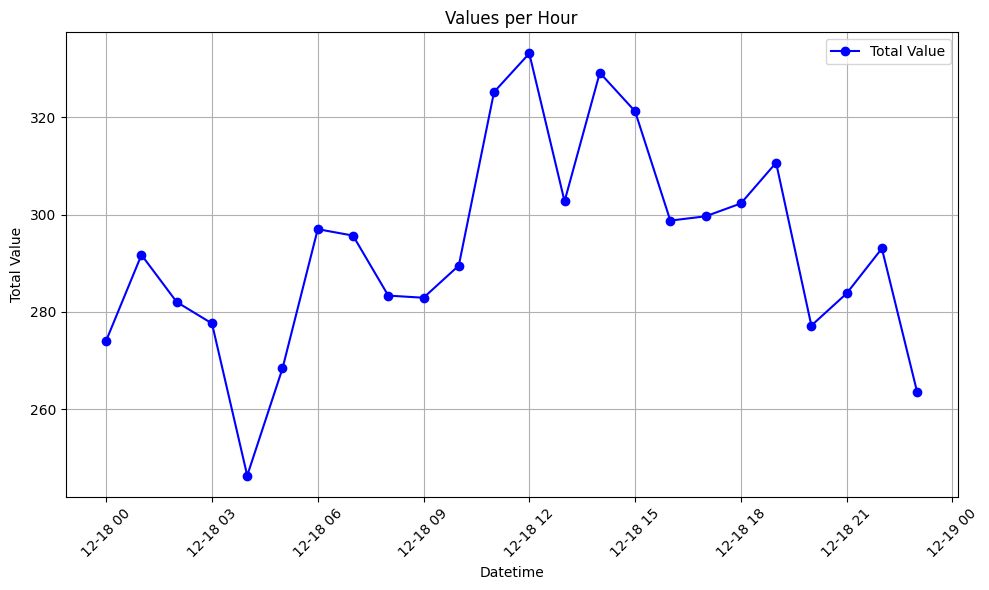

In [ ]:
# Agrupo los daots por hora
df_grouped = df_ultimo_dia.groupby('Datetime')['Value'].sum().reset_index()

# Plot the data per hour
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Datetime'], df_grouped['Value'], marker='o', linestyle='-', color='b', label='Total Value')

# Customize the plot with titles and labels
plt.title('Values per Hour')
plt.xlabel('Datetime')
plt.ylabel('Total Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# produccion total por dia

In [ ]:

# agrupo port fecha y claculo el valor total por fecha
df_total_per_day = df_melted.groupby('Date')['Value'].sum().reset_index()

# impromo los resultados
print(df_total_per_day)


          Date     Value
0   2024-01-01   9263.32
1   2024-01-02   7928.36
2   2024-01-03   6765.44
3   2024-01-04   6197.40
4   2024-01-05   6650.60
..         ...       ...
344 2024-12-14   6410.36
345 2024-12-15   6665.56
346 2024-12-16  10037.28
347 2024-12-17   7692.96
348 2024-12-18   7029.00

[349 rows x 2 columns]


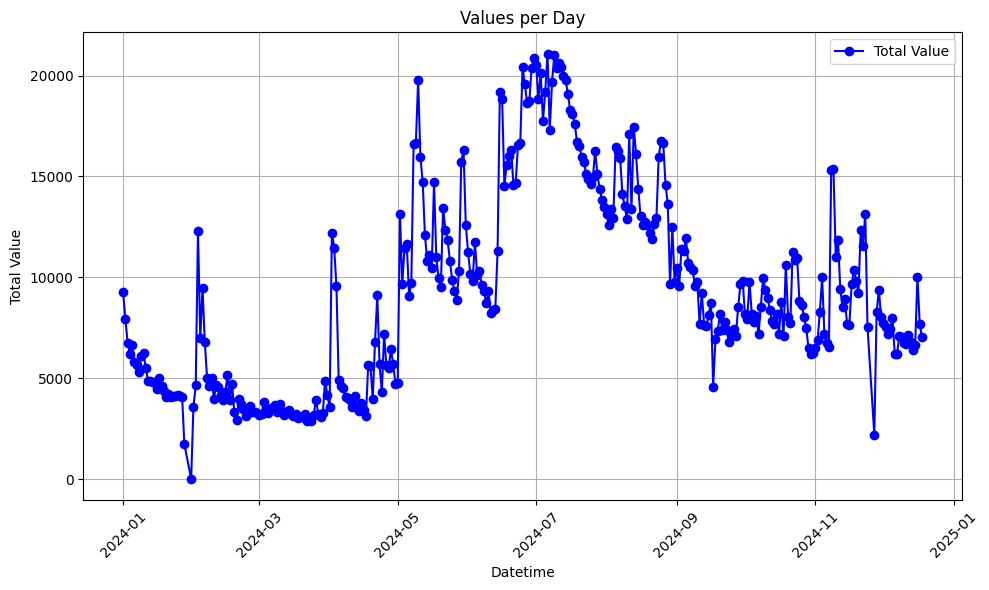

In [ ]:
# Agrupo los datos por hora
df_grouped = df_total_per_day.groupby('Date')['Value'].sum().reset_index()

# generoi el grafiuco
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Date'], df_grouped['Value'], marker='o', linestyle='-', color='b', label='Total Value')

# personalizo el grafico
plt.title('Values per Day')
plt.xlabel('Datetime')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Produccion de los ultimos 30 dias

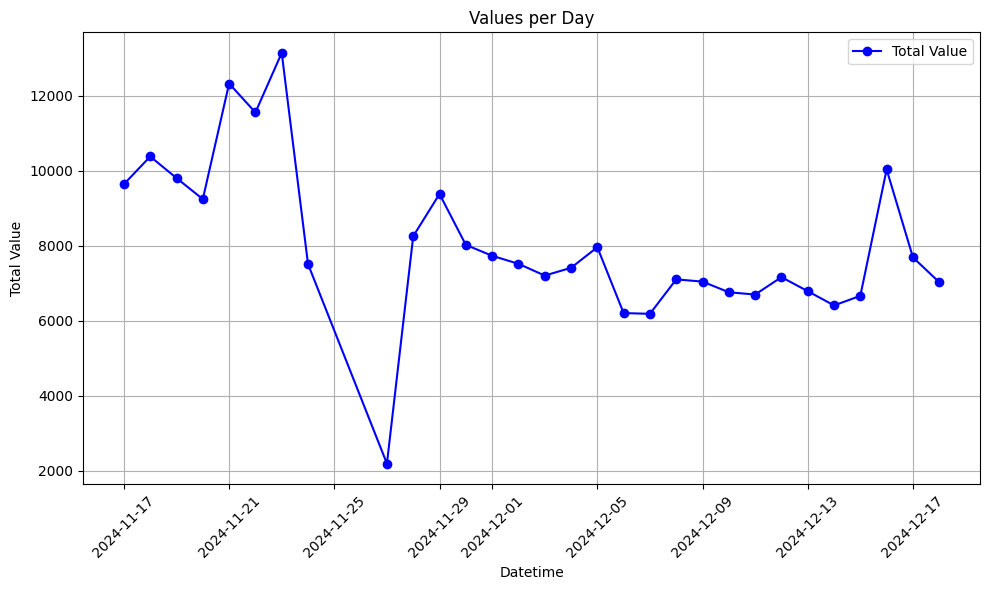

In [ ]:
# Agrupo los datos por hora
df_grouped = df_total_per_day.groupby('Date')['Value'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Date', ascending=False)
df_grouped = df_grouped.head(30)
# generoi el grafiuco
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Date'], df_grouped['Value'], marker='o', linestyle='-', color='b', label='Total Value')

# personalizo el grafico
plt.title('Values per Day')
plt.xlabel('Datetime')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Top 5 dias con menor producciopn

In [ ]:
# ortdeno de manera ascendiente
df_total_per_day_sorted = df_total_per_day.sort_values(by='Value', ascending=True)

# selecciono el top 5
df_lowest_days = df_total_per_day_sorted.head(5)

print(df_lowest_days)

          Date    Value
28  2024-01-31    10.12
27  2024-01-28  1716.00
327 2024-11-27  2190.32
81  2024-03-24  2858.68
79  2024-03-22  2887.28


# Top 5 Dias con mayor produccion

In [ ]:
# Ordeno d emanera decendiente
df_total_per_day_sorted = df_total_per_day.sort_values(by='Value', ascending=False)

# Selecciono el top 5
df_lowest_days = df_total_per_day_sorted.head(5)

print(df_lowest_days)

          Date     Value
185 2024-07-06  21090.52
188 2024-07-09  21038.16
179 2024-06-30  20881.08
190 2024-07-11  20640.40
180 2024-07-01  20542.72


# Grafico de produccion por mes

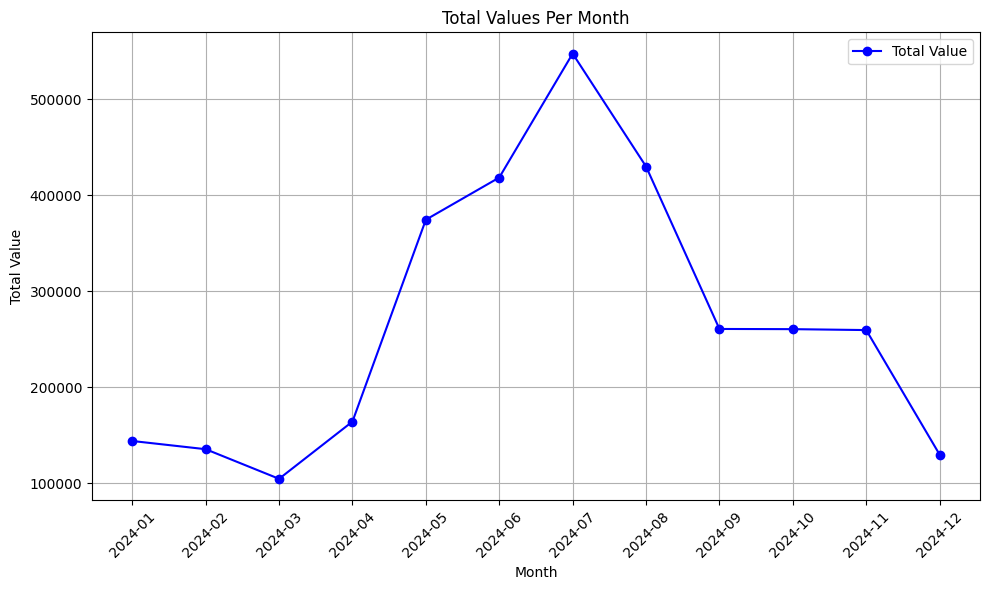

In [ ]:
df_melted['YearMonth'] = df_melted['Date'].dt.to_period('M')

# Agrupo por año
df_monthly_total = df_melted.groupby('YearMonth')['Value'].sum().reset_index()

# Genero la grafica
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_total['YearMonth'].astype(str), df_monthly_total['Value'], marker='o', linestyle='-', color='b', label='Total Value')

# perosnalizo la grafica
plt.title('Total Values Per Month')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# mnuetro la grafica
plt.show()

¿Cuál ha sido la generación diaria de los últimos 30 días?
¿Cuánta energía en total ha generado cada mes durante todo el año?
¿Cuáles son las horas donde se genera más energía y las horas donde se genera menos?
¿Cómo es la distribución y qué tan dispersa es la generación en cada mes?

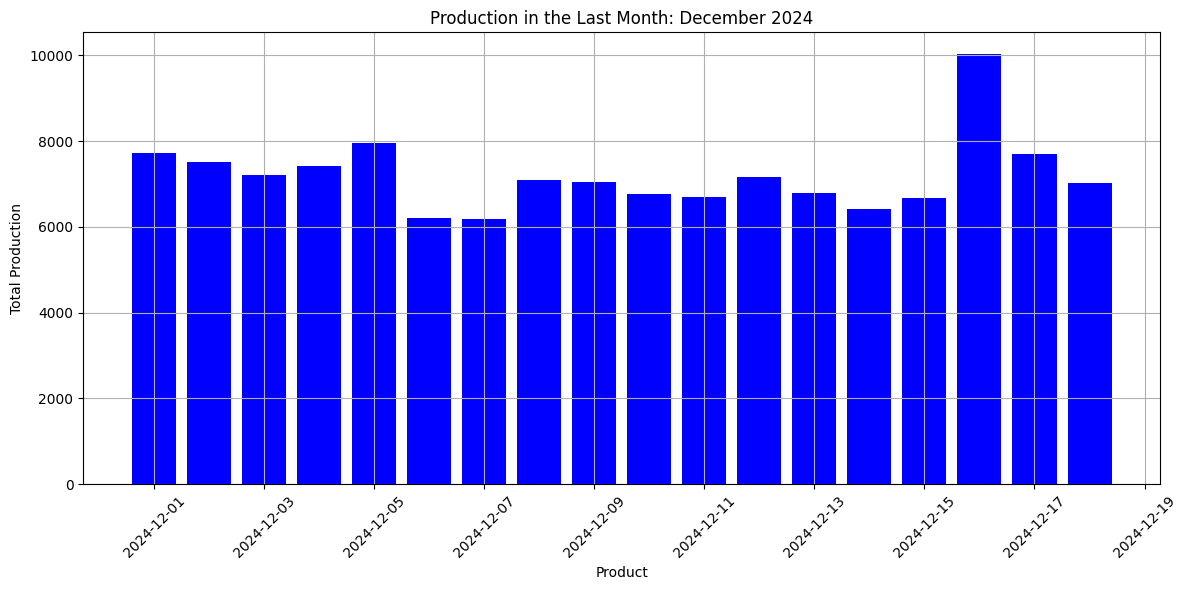

In [ ]:
ultimo_mes = df_melted['Date'].max().replace(day=1)

# Filtro la data al ultimo mes
df_last_month = df_melted[df_melted['Date'].dt.to_period('M') == ultimo_mes.to_period('M')]

# Agrupo los valores
df_last_month_production = df_last_month.groupby('Date')['Value'].sum().reset_index()

# Genero la grafica
plt.figure(figsize=(12, 6))
plt.bar(df_last_month_production['Date'], df_last_month_production['Value'], color='b')

# personalizo encabezados
plt.title(f'Production in the Last Month: {ultimo_mes.strftime("%B %Y")}')
plt.xlabel('Product')
plt.ylabel('Total Production')
plt.xticks(rotation=45)  # Rotate the product names for better readability
plt.grid(True)

# muestro el  grafico
plt.tight_layout()
plt.show()